# An Empirical Investigation of Video Game Sales and Success Factors
Rajesh Easwaramoorthy 122242579

Dharshan Senthilkumar 121979865

Amulya Grace Bandlamudi 122256095

## Introduction

Over the past several decades, video games have grown from simple arcade experiences into one of the most influential and profitable entertainment industries in the world. With thousands of games released across multiple platforms and regions, commercial success in gaming is shaped by many interacting factors. Some titles become global blockbusters, while others-despite strong reviews—remain relatively unknown. Understanding why this happens is an interesting problem not only for game developers and publishers, but also for data scientists interested in modeling complex, real-world systems.

In this tutorial, we analyze a large dataset of video games released between 1980 and 2016 to explore what drives success in the gaming industry. The dataset contains information on more than 16,000 games, including their platforms, genres, publishers, regional sales, and critic and user ratings. Using this data, we aim to uncover long-term trends in the industry and examine how different attributes relate to commercial performance.

Our analysis follows the complete data science pipeline. We begin by cleaning the raw dataset and addressing missing or inconsistent values. We then perform exploratory data analysis to understand how game releases and sales have evolved over time, which platforms and manufacturers have dominated the market, and how genre popularity differs across regions. Statistical hypothesis testing is used to evaluate common assumptions, such as whether critic scores meaningfully correlate with sales or whether regional markets have distinct genre preferences.

In the later stages of the tutorial, we shift toward predictive modeling. By framing commercial success as a classification problem, we build machine learning models that attempt to predict whether a game will become a blockbuster based on features such as release year, platform, genre, and publisher. We compare multiple models and analyze feature importance to better understand which factors play the largest role in these predictions.

The goal of this project is not just to produce accurate models, but to tell a clear and interpretable story using data. By combining visualization, statistical reasoning, and machine learning, we aim to provide a deeper understanding of how the video game industry operates and why some games succeed while others do not. This tutorial is designed to be approachable for readers with basic data science knowledge while still offering meaningful insights into a real-world dataset.

## *Setting Up the Workspace*

To begin the project, we first load all the Python libraries that will support the rest of our analysis. This step might look straightforward, but it essentially prepares the entire environment in which we will explore, visualize, and model video game data.

Pandas and NumPy form the backbone of our workflow. Pandas makes it easy to read and manipulate the dataset-things like filtering games by year, grouping sales by platform, or computing summary statistics. NumPy provides fast numerical operations, which becomes especially useful when we work with larger arrays of values such as critic and user scores.

For visualization, Matplotlib and Seaborn will help translate raw numbers into meaningful visuals. Throughout this tutorial, we’ll rely on them to uncover sales trends across decades, compare regions like North America and Japan, and analyze how genres and platforms performed over time. Good visualization is often the difference between staring at numbers and actually understanding the story they tell.

SciPy is included for statistical tests, which will allow us to formally measure relationships-for example, whether higher critic scores truly correlate with higher sales, or whether some genres consistently outperform others. These tests add depth to our conclusions instead of relying on intuition alone.

Finally, scikit-learn provides machine learning tools we’ll use to predict which video games become blockbusters. This includes splitting the dataset into training and testing sets, converting categorical features into numeric form, and evaluating models like Logistic Regression, Random Forests, and Gradient Boosting. These models help us answer a major question: can success be predicted from a game’s attributes?

We also apply a few settings to make the notebook cleaner and easier to follow-such as suppressing unnecessary warnings, formatting numerical outputs, and choosing a consistent plot style.

With everything loaded successfully, we now have a complete toolkit ready to explore over 16,000 video games and uncover the patterns behind what makes a game successful.

In [28]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

# Settings
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

print("Libraries loaded successfully!")

Libraries loaded successfully!


## *Loading the Video Game Dataset*

With the workspace ready, we can now load the dataset that will drive the rest of our analysis. The file contains detailed information on thousands of video games released across several decades. Each row corresponds to one game, and the columns describe attributes such as platform, genre, release year, critic and user ratings, and regional sales numbers.

Once the file is read into a pandas DataFrame, we print the number of rows and columns to understand the scale of the dataset. The ⁠ head() ⁠ function then displays the first few entries, giving us a quick snapshot of how the data is structured.

As you look at this preview, try to get a sense of which features might be useful for answering our main questions. Some columns relate directly to a game's success, while others may serve as predictors or require cleaning before they can be used effectively.

This initial inspection sets the stage for the upcoming steps, where we will clean the data, explore patterns, and eventually build models that help explain what makes a video game successful.

In [29]:
# Load dataset
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

print(f"Dataset loaded: {df.shape[0]:,} games × {df.shape[1]} features")
df.head()

Dataset loaded: 16,719 games × 16 features


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.00,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.00,51.00,8,322.00,Nintendo,E
1,Super Mario Bros.,NES,1985.00,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.00,73.00,8.3,709.00,Nintendo,E
3,Wii Sports Resort,Wii,2009.00,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.00,73.00,8,192.00,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


## *First Look at the Numbers: Summary Statistics*

Before jumping into plots and models, it helps to step back and ask a simple question: what do the basic numbers in this dataset look like? The ⁠ describe() ⁠ function gives us a quick statistical summary of all the numeric columns, and there is already a lot we can learn from it.

The first thing to notice is the ⁠ Year_of_Release ⁠. The average year is around 2006, with most games falling between 2003 (25th percentile) and 2010 (75th percentile). This tells us that the dataset is heavily focused on the PS2, Xbox 360, PS3, and Wii era, even though the full range goes all the way from 1980 up to a few entries labeled as 2020. Those very late years might be data entry issues that we’ll keep in mind for cleaning.

Looking at the sales columns, the typical game does not sell very much at all. The median ⁠ Global_Sales ⁠ is only 0.17 million units (170,000 copies), and even the 75th percentile is just 0.47 million. In other words, three-quarters of games never reach half a million units sold. On the other hand, the maximum ⁠ Global_Sales ⁠ is 82.53 million units, which is enormous compared to the average of 0.53. This huge gap between the median and the max suggests a very skewed distribution: a small number of blockbusters bring in massive sales, while most titles stay relatively small.

The regional sales columns (⁠ NA_Sales ⁠, ⁠ EU_Sales ⁠, ⁠ JP_Sales ⁠, and ⁠ Other_Sales ⁠) show a similar pattern. The means are quite low, and many of the lower quartiles are at or close to zero, which means a lot of games barely register in some regions. This matches the reality of the industry where only a fraction of games gain global attention.

For the rating-related columns, ⁠ Critic_Score ⁠ has a mean around 69 with a standard deviation of about 14, and most scores lie between 60 and 79 (from the 25th to 75th percentile). That feels similar to how review scores usually cluster in practice: very few games receive truly terrible or truly perfect scores. The counts for ⁠ Critic_Score ⁠, ⁠ Critic_Count ⁠, and ⁠ User_Count ⁠ are lower than the total number of games, which tells us that not every title has rating information. We’ll need to handle these missing values carefully when we study how quality relates to sales.

Overall, this summary already hints at two important themes for the rest of the project: the video game market is extremely skewed, with a handful of hits dominating the charts, and not all games are equally well-documented in terms of reviews. Both of these facts will influence how we interpret patterns and build predictive models later on.

In [30]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [31]:
# Statistical summary
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.00,16719.00,16719.00,16719.00,16719.00,16719.00,8137.00,8137.00,7590.00
mean,2006.49,0.26,0.15,0.08,0.05,0.53,68.97,26.36,162.23
std,5.88,0.81,0.50,0.31,0.19,1.55,13.94,18.98,561.28
min,1980.00,0.00,0.00,0.00,0.00,0.01,13.00,3.00,4.00
25%,2003.00,0.00,0.00,0.00,0.00,0.06,60.00,12.00,10.00
50%,2007.00,0.08,0.02,0.00,0.01,0.17,71.00,21.00,24.00
75%,2010.00,0.24,0.11,0.04,0.03,0.47,79.00,36.00,81.00
max,2020.00,41.36,28.96,10.22,10.57,82.53,98.00,113.00,10665.00


## *Missing Data: How Complete Is Our View of the Industry?*

After getting a rough sense of the basic statistics, the next natural question is: how complete is this dataset? Real-world data is almost never perfect, and this one is no exception. To understand the gaps, we check how many values are missing in each column and then visualize the percentage of missing data.

The results are pretty striking. Over half of the games are missing ⁠ User_Count ⁠, ⁠ Critic_Score ⁠, and ⁠ Critic_Count ⁠. That means for a large portion of the dataset, we simply do not know how critics rated the game or how many users participated in the scores. Similarly, around 40 percent of the entries are missing ⁠ Rating ⁠, ⁠ User_Score ⁠, and even the ⁠ Developer ⁠ field. This suggests that less prominent or older titles are often poorly documented compared to big-name releases.

On the other hand, some key fields are almost fully populated. ⁠ Genre ⁠, ⁠ Publisher ⁠, and ⁠ Name ⁠ are missing in only a handful of cases, and ⁠ Year_of_Release ⁠ is absent for about 1.6 percent of the games. These small gaps are manageable, but the large holes in rating-related columns will definitely influence how we design our analysis.

This step is important for two reasons. First, it warns us not to blindly rely on critic and user metrics, because any analysis using them will automatically ignore a big chunk of the dataset. Second, it forces us to make conscious choices about how to handle missing values: whether to drop certain rows, impute some of the information, or run separate analyses on the subset of games that have complete rating data. The decisions we make here will directly affect the conclusions we draw later about the relationship between quality and commercial success.

                 Count  Percentage
User_Count        9129       54.60
Critic_Score      8582       51.33
Critic_Count      8582       51.33
Rating            6769       40.49
User_Score        6704       40.10
Developer         6623       39.61
Year_of_Release    269        1.61
Publisher           54        0.32
Name                 2        0.01
Genre                2        0.01


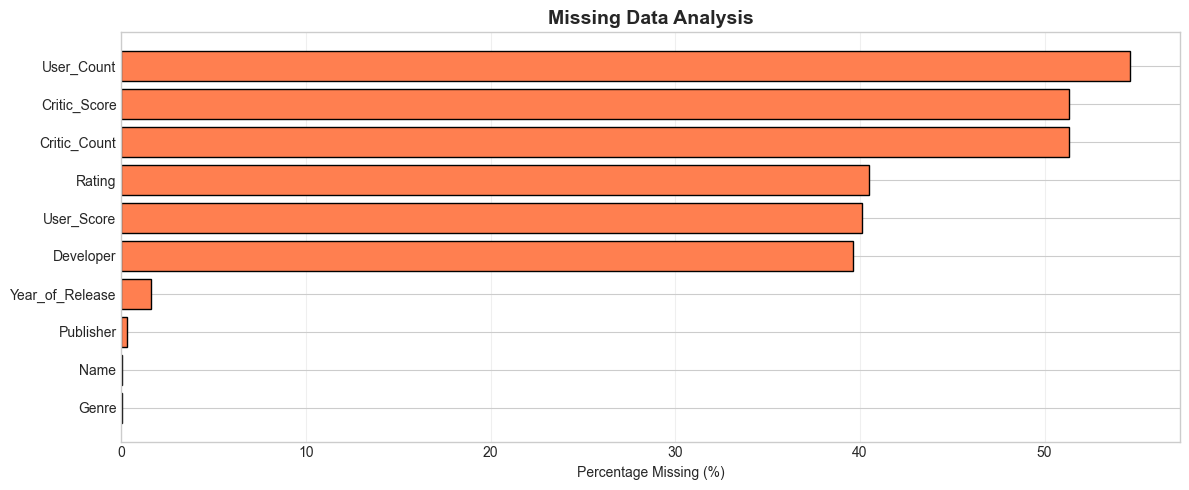

In [32]:
# Checking for missing values
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Count': missing,
    'Percentage': missing_pct
}).sort_values('Count', ascending=False)

print(missing_df[missing_df['Count'] > 0])

# Visualizing the data
plt.figure(figsize=(12, 5))
missing_data = missing_df[missing_df['Count'] > 0]
plt.barh(missing_data.index, missing_data['Percentage'], color='coral', edgecolor='black')
plt.xlabel('Percentage Missing (%)')
plt.title('Missing Data Analysis', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## *Cleaning the Data and Building New Features*

Raw datasets rarely arrive in a state that is ready for analysis, and this video game dataset is no exception. Before we can explore any meaningful trends, we need to address missing values, correct inconsistent formats, and create new features that will help reveal deeper patterns in the industry.

The first step is to create a working copy of the dataset so we can freely modify it without affecting the original. We then remove entries with missing release years, since the year is essential for understanding industry trends over time. Converting the year column to an integer ensures consistency and makes it easier to group games by decade or generation later on. Another small but important fix is handling the ⁠ User_Score ⁠ column, which sometimes contains the string ⁠ "tbd" ⁠ instead of a numerical value. By converting invalid values to ⁠ NaN ⁠, we make sure the column can be used for calculations without errors.

Once the basic cleaning is done, we start constructing new features that enhance our analysis. Grouping games by decade allows us to compare the popularity of genres and platforms across different eras. Mapping each platform to its manufacturer gives us a clearer picture of how companies like Sony, Nintendo, and Microsoft have competed over the years. We also scale user scores to match the 0–100 critic score system, allowing us to compute a simple difference between critic and user impressions.

One of the most useful additions is the ⁠ Is_Blockbuster ⁠ label, which marks any game that sold at least one million units. This will become the target variable for our machine learning models later, helping us analyze which characteristics are most associated with commercial success. Finally, identifying each game's dominant sales region highlights whether a title performed best in North America, Europe, Japan, or elsewhere.

After these steps, the dataset is much more structured and informative, and we now know that about 12.5% of all games in the dataset qualify as blockbusters. These cleaned and enriched features will be the backbone of the exploratory analysis and predictive modeling that follow.

In [33]:
# Creating a working copy
df_clean = df.copy()

print(f"Original size: {len(df_clean):,} games")

# Remove all the rows with missing Year
df_clean = df_clean.dropna(subset=['Year_of_Release'])
df_clean['Year_of_Release'] = df_clean['Year_of_Release'].astype(int)

df_clean['User_Score'] = pd.to_numeric(df_clean['User_Score'], errors='coerce')

print(f"After cleaning: {len(df_clean):,} games")

Original size: 16,719 games
After cleaning: 16,450 games


In [34]:
# Create new features

# Decade
df_clean['Decade'] = (df_clean['Year_of_Release'] // 10) * 10

# Platform manufacturer
platform_map = {
    'PS': 'Sony', 'PS2': 'Sony', 'PS3': 'Sony', 'PS4': 'Sony', 'PSP': 'Sony', 'PSV': 'Sony',
    'XB': 'Microsoft', 'X360': 'Microsoft', 'XOne': 'Microsoft',
    'Wii': 'Nintendo', 'WiiU': 'Nintendo', 'NES': 'Nintendo', 'SNES': 'Nintendo', 
    'N64': 'Nintendo', 'GC': 'Nintendo', 'DS': 'Nintendo', '3DS': 'Nintendo', 
    'GB': 'Nintendo', 'GBA': 'Nintendo',
    'PC': 'PC',
    'DC': 'Sega', 'SAT': 'Sega', 'GEN': 'Sega'
}
df_clean['Manufacturer'] = df_clean['Platform'].map(platform_map).fillna('Other')

# User score scaled to 0-100
df_clean['User_Score_Scaled'] = df_clean['User_Score'] * 10

# Score difference (critic - user)
df_clean['Score_Diff'] = df_clean['Critic_Score'] - df_clean['User_Score_Scaled']

# Blockbuster indicator (1M+ sales)
df_clean['Is_Blockbuster'] = (df_clean['Global_Sales'] >= 1.0).astype(int)

# Dominant region
df_clean['Dominant_Region'] = df_clean[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].idxmax(axis=1)
df_clean['Dominant_Region'] = df_clean['Dominant_Region'].str.replace('_Sales', '')

print(f"Features created")
print(f"Blockbusters (1M+): {df_clean['Is_Blockbuster'].sum():,} ({df_clean['Is_Blockbuster'].mean()*100:.1f}%)")

Features created
Blockbusters (1M+): 2,054 (12.5%)


## *Exploring Industry Trends Over Time*

Before diving into genres, platforms, or predictive modeling, it's helpful to zoom out and look at how the video game industry has evolved over the years. By grouping games by their release year, we can visualize two important trends: how many titles were released each year, and how global sales shifted over time. These two patterns together tell a surprisingly rich story about the rise and transformation of gaming.

The first plot shows the number of games released annually. In the early years, releases were relatively modest-an expected pattern given the smaller size of the industry in the 1980s and early 1990s. But starting from the late 1990s and moving into the 2000s, there is a dramatic surge. This period aligns with major console generations such as the PlayStation 2, Nintendo DS, and Xbox 360 era, where development became more widespread and publishers released significantly more titles. The peak appears around 2008–2010, after which the number of yearly releases begins to fall. This decline likely reflects the shift toward mobile gaming, digital marketplaces, and a general consolidation within the industry.

The second plot focuses on global sales per year, and it reveals an even sharper rise and fall. Global sales grow steadily through the 1990s and early 2000s, reaching an all-time high in 2008, where the industry sold roughly 672 million units. This peak is no coincidence-2008 marks the height of the Wii, the popularity of rhythm games like Guitar Hero and Rock Band, and some of the biggest blockbuster franchises becoming mainstream. After this peak, sales begin to taper off, reflecting a more competitive environment, platform fragmentation, and perhaps a shift in consumer habits toward digital and mobile formats.

Together, these visuals illustrate the lifecycle of a rapidly expanding industry: steady growth, explosive expansion, and eventual stabilization. Understanding this timeline helps frame all of our later analyses-platform competition, genre trends, regional differences, and even the predictive modeling of blockbusters all make more sense once we see where the industry has been and how it has changed over time.

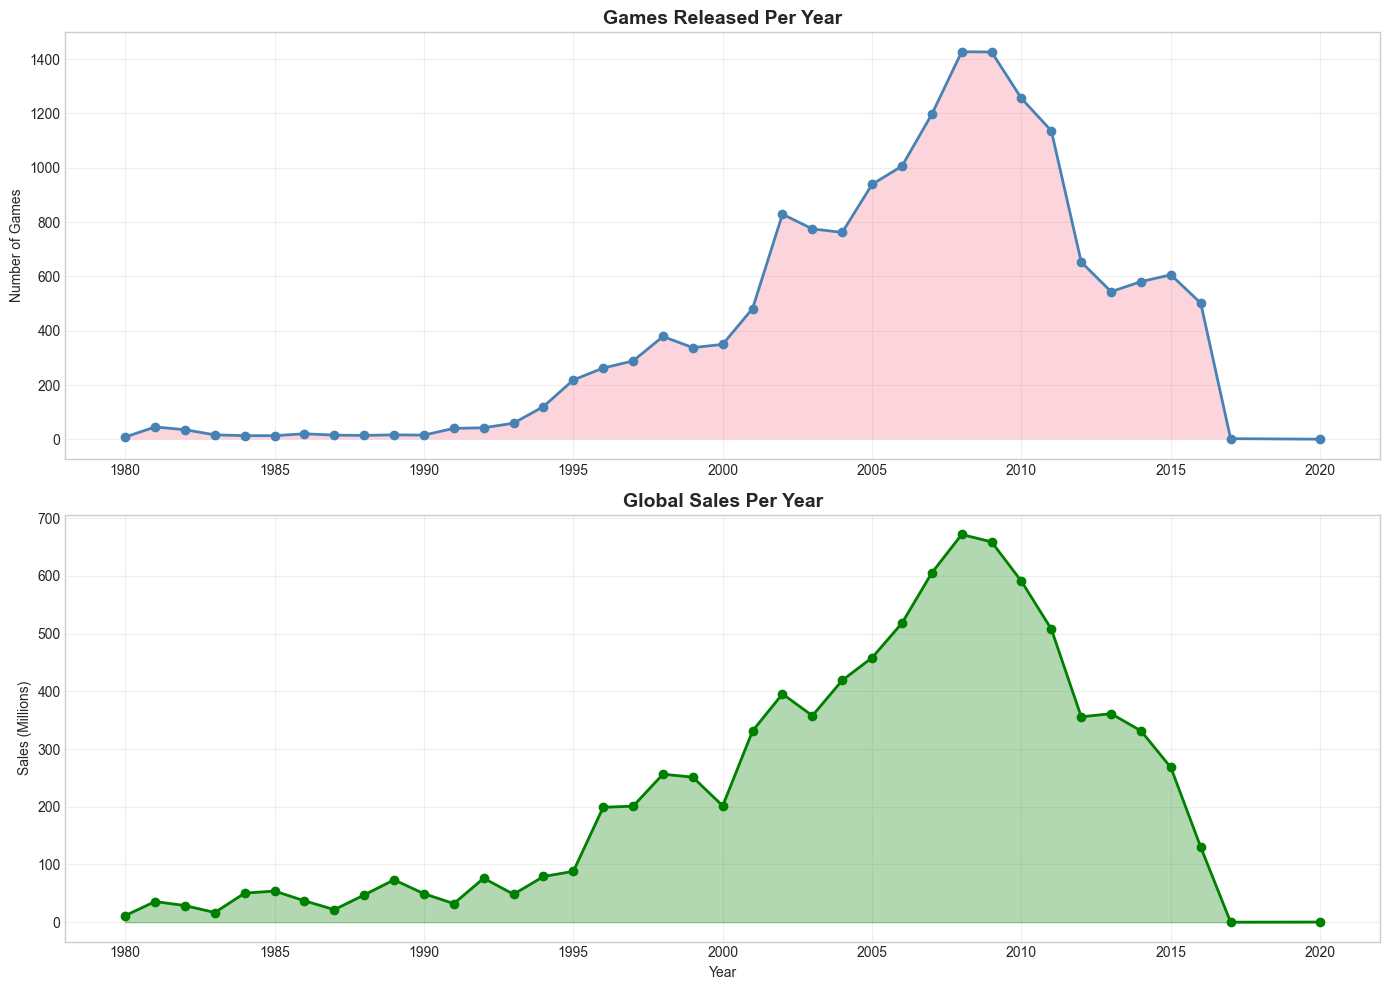


Peak sales: 2008 with 672M units


In [35]:
# Number of games released and sales 
yearly_stats = df_clean.groupby('Year_of_Release').agg({
    'Name': 'count',
    'Global_Sales': 'sum'
}).rename(columns={'Name': 'Num_Games'})

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Plot for games released
axes[0].plot(yearly_stats.index, yearly_stats['Num_Games'], marker='o', linewidth=2, color='steelblue')
axes[0].fill_between(yearly_stats.index, yearly_stats['Num_Games'], alpha=0.3)
axes[0].set_title('Games Released Per Year', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Number of Games')
axes[0].grid(True, alpha=0.3)

# Plot for Global sales
axes[1].plot(yearly_stats.index, yearly_stats['Global_Sales'], marker='o', linewidth=2, color='green')
axes[1].fill_between(yearly_stats.index, yearly_stats['Global_Sales'], alpha=0.3, color='green')
axes[1].set_title('Global Sales Per Year', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Sales (Millions)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

peak_year = yearly_stats['Global_Sales'].idxmax()
peak_sales = yearly_stats['Global_Sales'].max()
print(f"\nPeak sales: {peak_year} with {peak_sales:.0f}M units")

## *Platform Analysis: Who Really Dominated the Console Wars?*

No discussion of video game success is complete without looking at the platforms that defined each era. Whether it was the NES shaping the childhoods of the 80s, the PlayStation 2 dominating living rooms in the 2000s, or the Xbox 360 fueling online multiplayer culture, platforms play a major role in how games reach audiences.

To understand this landscape, we begin by ranking platforms based on their total global sales. The bar chart on the left highlights the top 15 platforms of all time, and the results immediately stand out: the PlayStation 2 leads by a wide margin, with over 1,200 million units sold across its library. Close behind are other major systems like the Xbox 360, PlayStation 3, Nintendo Wii, and Nintendo DS-consoles that helped shape some of the most iconic gaming eras. Seeing these platforms side by side shows how different generations of hardware contributed to the industry’s overall momentum.

The second plot shifts from individual platforms to manufacturers. By grouping platforms under companies like Sony, Nintendo, and Microsoft, we can see how each major player contributed to global sales. Nintendo and Sony together make up the majority of the market, with Microsoft trailing but still holding a notable share. This breakdown reinforces the idea that the “console wars” were never purely about individual platforms, but rather the broader strategies and ecosystems built by each company.

Finally, the printed summary confirms our visual impression: *the PlayStation 2 stands as the single most commercially successful platform in the dataset*, a testament to its longevity, massive game library, and influence on the industry.

This platform-level perspective sets the stage for the next part of our analysis, where we investigate whether certain genres thrive on specific systems and how platform choice relates to the success of a game.

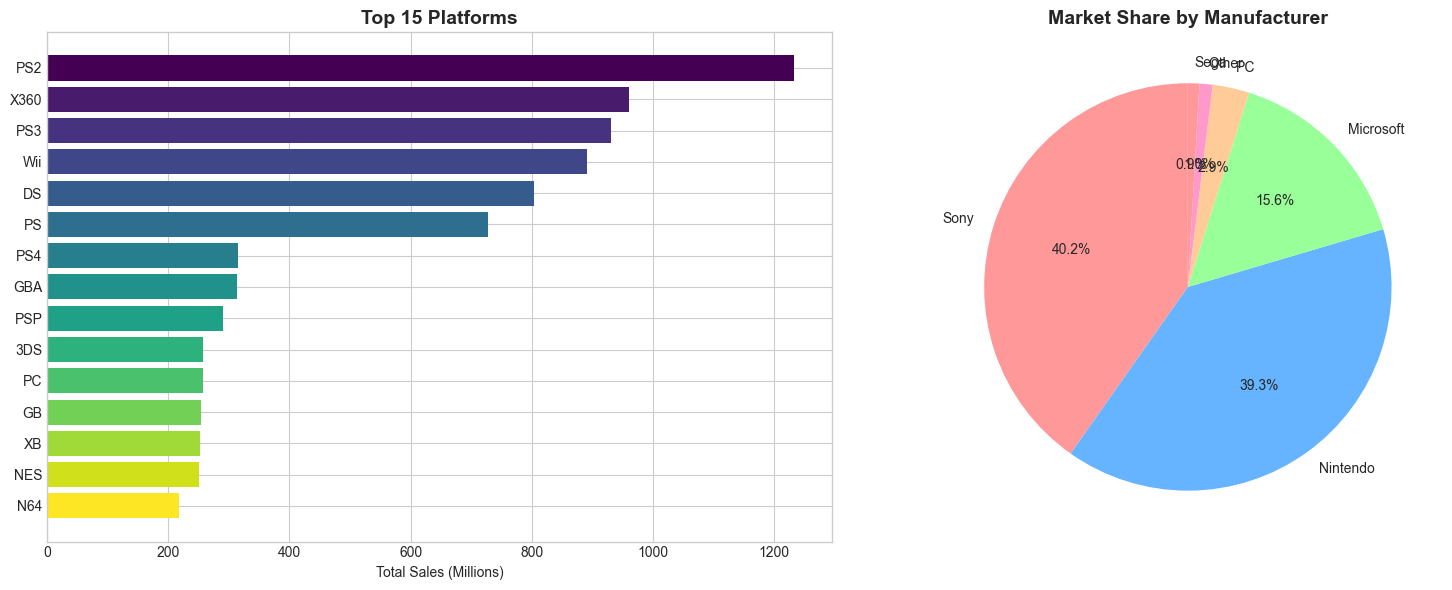


 Top platform: PS2 (1233M sales)


In [36]:
# Top sales platforms
platform_sales = df_clean.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top 15 sales latforms
top_15 = platform_sales.head(15)
colors = plt.cm.viridis(np.linspace(0, 1, len(top_15)))
axes[0].barh(range(len(top_15)), top_15.values, color=colors)
axes[0].set_yticks(range(len(top_15)))
axes[0].set_yticklabels(top_15.index)
axes[0].set_xlabel('Total Sales (Millions)')
axes[0].set_title('Top 15 Platforms', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()

# Manufacturer market share
mfr_sales = df_clean.groupby('Manufacturer')['Global_Sales'].sum().sort_values(ascending=False)
colors_pie = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc']
axes[1].pie(mfr_sales, labels=mfr_sales.index, autopct='%1.1f%%', 
           startangle=90, colors=colors_pie[:len(mfr_sales)])
axes[1].set_title('Market Share by Manufacturer', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n Top platform: {platform_sales.index[0]} ({platform_sales.values[0]:.0f}M sales)")

## *Genre Analysis: What Types of Games Drive the Industry?*

Genres are one of the most defining characteristics of a video game. Whether it’s an action-packed shooter or a thoughtful role-playing experience, the genre often sets expectations for gameplay style, target audience, and even commercial performance. To understand how different genres contribute to the market, we look at their total sales, average sales per game, how many titles exist in each category, and their overall market share.

The first chart shows *total global sales by genre*, and it immediately highlights the dominance of a few key categories. Action games lead comfortably, followed by Sports, Shooters, and Role-Playing titles. These genres tend to attract wide audiences and often include long-running franchises, which helps explain their consistently high sales numbers.

The second chart takes a different angle by examining *average sales per game*. This metric shows not just how popular a genre is overall, but how well a typical game performs within that category. Shooter and Platform games rise to the top here, meaning individual titles in these genres are more likely to achieve strong sales, even if the total number of games is smaller. This difference between total volume and per-game performance is an interesting reminder that a genre’s influence is not just about how many games it produces.

Next, we explore *the number of games released in each genre*. Action has the largest catalogue by far, with Sports and Role-Playing titles also appearing frequently. Meanwhile, genres such as Puzzle, Strategy, and Adventure appear in much smaller quantities. Seeing these counts alongside the sales figures helps clarify which genres are crowded and which ones succeed despite having fewer releases.

Finally, the pie chart summarizes *genre market share*, giving a clean snapshot of how the industry’s sales are distributed. Action games alone account for a significant portion of global sales, with Sports, Shooters, and Role-Playing titles also taking meaningful slices of the market.

Altogether, these visuals show that while Action dominates in both quantity and total revenue, genres like Shooter and Platform games punch above their weight in terms of average performance. This helps us understand not only what players tend to purchase, but also which types of games might be more likely to succeed commercially.

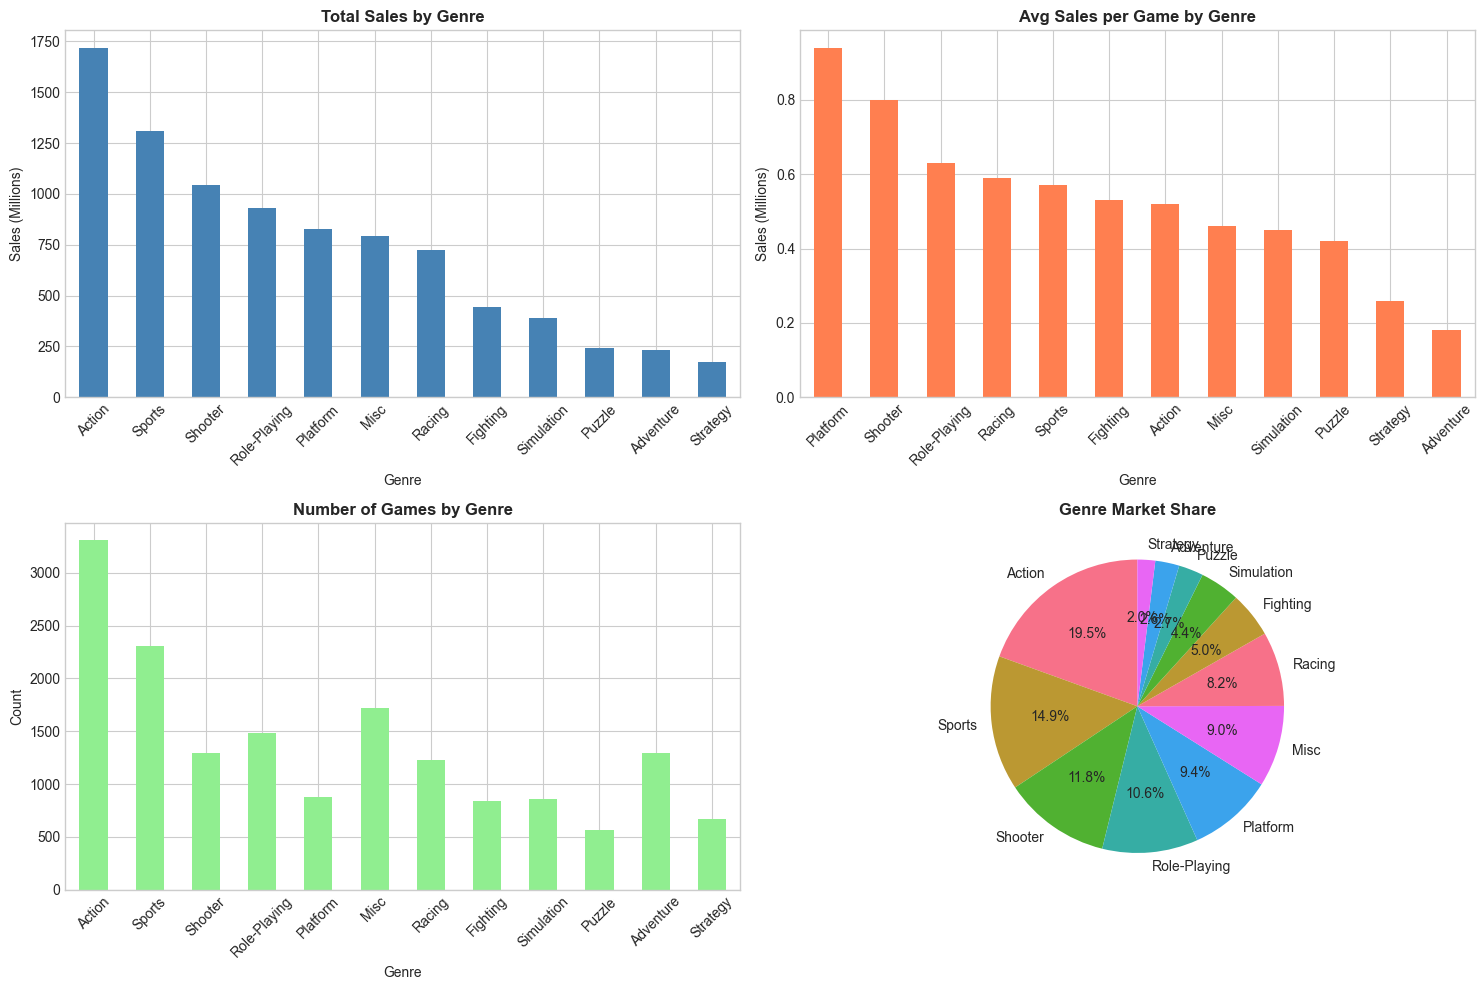


 Genre Statistics:
              Total_Sales  Avg_Sales  Num_Games
Genre                                          
Action            1717.63       0.52       3308
Sports            1310.39       0.57       2306
Shooter           1041.83       0.80       1296
Role-Playing       930.90       0.63       1483
Platform           825.86       0.94        878
Misc               790.94       0.46       1721
Racing             723.70       0.59       1226
Fighting           442.63       0.53        837
Simulation         388.40       0.45        858
Puzzle             240.33       0.42        569
Adventure          233.46       0.18       1293
Strategy           172.85       0.26        673


In [37]:
# Plot for sales by Genre
genre_stats = df_clean.groupby('Genre').agg({
    'Global_Sales': ['sum', 'mean'],
    'Name': 'count'
}).round(2)
genre_stats.columns = ['Total_Sales', 'Avg_Sales', 'Num_Games']
genre_stats = genre_stats.sort_values('Total_Sales', ascending=False)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot for total sales
genre_stats['Total_Sales'].plot(kind='bar', ax=axes[0,0], color='steelblue')
axes[0,0].set_title('Total Sales by Genre', fontweight='bold')
axes[0,0].set_ylabel('Sales (Millions)')
axes[0,0].tick_params(axis='x', rotation=45)

# Plot for average sales
genre_stats.sort_values('Avg_Sales', ascending=False)['Avg_Sales'].plot(
    kind='bar', ax=axes[0,1], color='coral')
axes[0,1].set_title('Avg Sales per Game by Genre', fontweight='bold')
axes[0,1].set_ylabel('Sales (Millions)')
axes[0,1].tick_params(axis='x', rotation=45)

# Plot for number of games by genre
genre_stats['Num_Games'].plot(kind='bar', ax=axes[1,0], color='lightgreen')
axes[1,0].set_title('Number of Games by Genre', fontweight='bold')
axes[1,0].set_ylabel('Count')
axes[1,0].tick_params(axis='x', rotation=45)

# Plot for market share bt genre
axes[1,1].pie(genre_stats['Total_Sales'], labels=genre_stats.index, autopct='%1.1f%%', startangle=90)
axes[1,1].set_title('Genre Market Share', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n Genre Statistics:")
print(genre_stats)

## *Regional Analysis: How Game Preferences Differ Around the World*

The global video game market is far from uniform. Players in North America, Europe, Japan, and other regions often gravitate toward different genres, platforms, and styles of play. To uncover these patterns, we examine both total sales by region and how various genres perform across these markets.

The first visualization compares *total sales across major regions*, and the result is immediately clear:  
*North America dominates the global market*, accounting for nearly half of all sales in the dataset. Europe follows as the second-largest region, with Japan-despite its rich gaming culture-taking a distant third. This reflects broader market trends, where Western markets tend to purchase more game units overall, even though Japanese players often show strong loyalty to specific franchises and genres.

The second visualization, a heatmap, breaks down *genre popularity by region*. This view reveals some striking differences. Action and Sports games perform strongly across all regions, with especially high sales in North America and Europe. Japan, on the other hand, shows a notable preference for Role-Playing games, reflecting long-running cultural ties to franchises like Pokémon, Final Fantasy, and Dragon Quest. Platform games also perform disproportionately well in Japan compared to other regions, which aligns with the popularity of Nintendo’s consoles and character-driven titles.

Seeing these differences side-by-side highlights how regional tastes influence global market outcomes. A game that performs moderately in one region might become a blockbuster in another depending on genre appeal and cultural preferences. Publishers often take these patterns into account when localizing content, choosing release strategies, and deciding which franchises to invest in.

Overall, these regional insights help us appreciate the diversity of the gaming community and set the context for our later modeling: understanding what makes a game successful requires acknowledging where in the world that success is coming from.

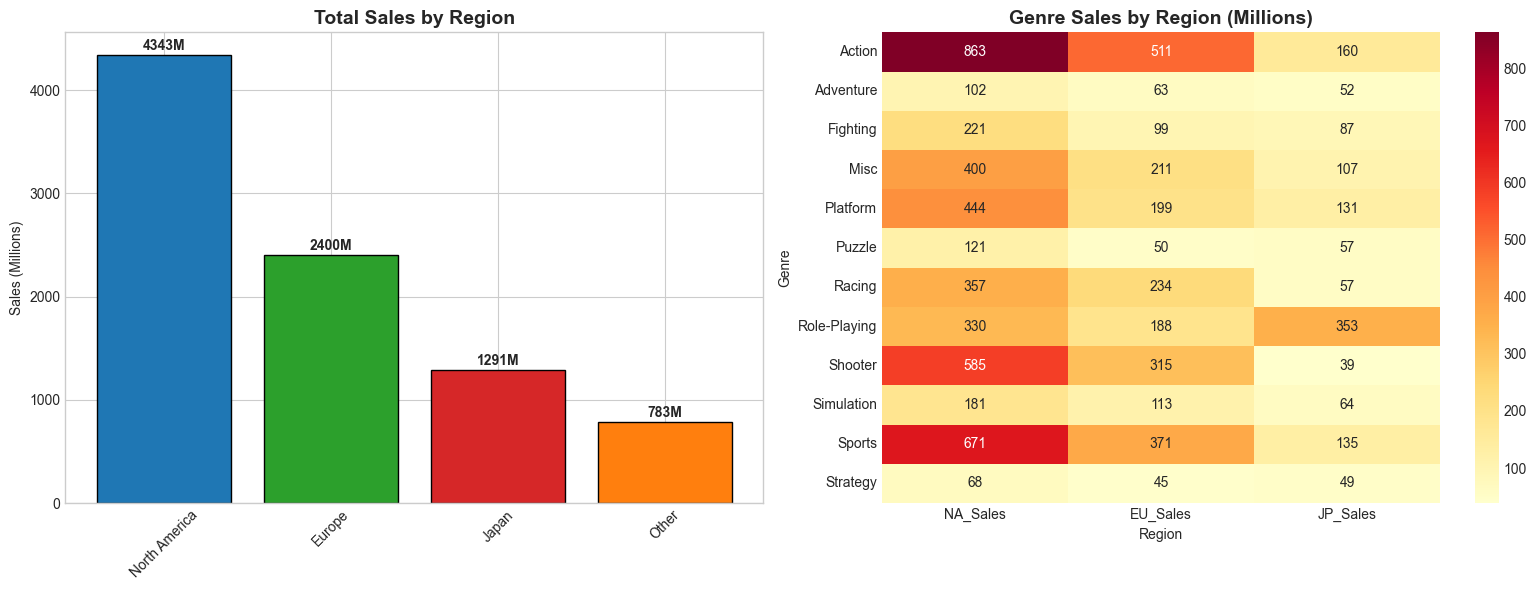


 Largest market: North America (4343M, 49.3%)


In [38]:
# Total sales by region
regional_sales = {
    'North America': df_clean['NA_Sales'].sum(),
    'Europe': df_clean['EU_Sales'].sum(),
    'Japan': df_clean['JP_Sales'].sum(),
    'Other': df_clean['Other_Sales'].sum()
}

# Genre sales by region
genre_region = df_clean.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales']].sum()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for total sales by region
colors = ['#1f77b4', '#2ca02c', '#d62728', '#ff7f0e']
axes[0].bar(regional_sales.keys(), regional_sales.values(), color=colors, edgecolor='black')
axes[0].set_title('Total Sales by Region', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Sales (Millions)')
axes[0].tick_params(axis='x', rotation=45)
for i, (k, v) in enumerate(regional_sales.items()):
    axes[0].text(i, v+50, f'{v:.0f}M', ha='center', fontweight='bold')

# Heatmap for genre sales by region
sns.heatmap(genre_region, annot=True, fmt='.0f', cmap='YlOrRd', ax=axes[1])
axes[1].set_title('Genre Sales by Region (Millions)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Region')

plt.tight_layout()
plt.show()

print(f"\n Largest market: North America ({regional_sales['North America']:.0f}M, {regional_sales['North America']/sum(regional_sales.values())*100:.1f}%)")

## *Do High Review Scores Actually Boost Sales?*

One of the most debated questions in the gaming world is whether review scores-either from professional critics or everyday players-have any real impact on a game’s commercial success. Intuitively, we might expect that better-reviewed games sell more copies. But when we plot these relationships and examine the correlations, the story becomes much more nuanced.

The first scatter plot compares *critic scores* to global sales. While there is a slight upward trend, the points are widely scattered, and the correlation coefficient comes out to only *0.237*. This means critic reviews have a weak positive relationship with sales-well-reviewed games do tend to sell a bit more, but the effect is far from strong. Many games with excellent scores sell modestly, while a few with average scores still become massive hits.

The second plot compares *user scores* to global sales, and the correlation drops even further to *0.088*. In other words, there is almost no meaningful relationship between how much players say they like a game and how many copies it sells. This might seem surprising at first, but it reflects real-world patterns: sales are heavily influenced by marketing budgets, franchise popularity, timing, platform availability, and regional trends-factors independent of score quality.

Together, these two views challenge the assumption that quality equals success. A high review score may help a game stand out, but it is far from the primary driver of sales. Likewise, games with average reviews can still dominate the charts if they belong to beloved franchises or hit the market at the right moment.

This insight sets the stage for identifying underrated gems-games that earned high critical praise but didn’t sell well-and *overrated blockbusters* that succeeded commercially despite mediocre reviews. These categories help highlight the fascinating disconnect between quality and popularity in the gaming industry.

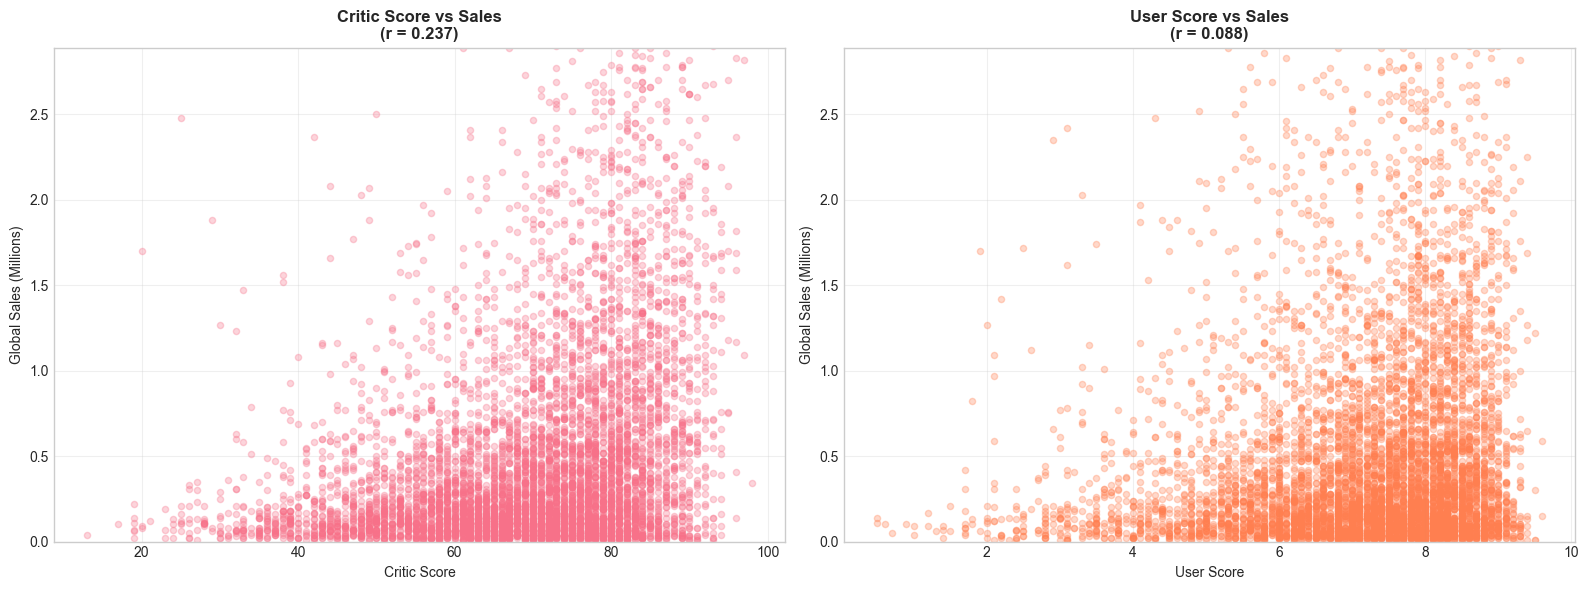


Correlation: Critic scores (0.237) vs User scores (0.088)


In [39]:
# Filtering out games with scores
df_scored = df_clean.dropna(subset=['Critic_Score', 'User_Score'])

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for Critic Score vs Sales
axes[0].scatter(df_scored['Critic_Score'], df_scored['Global_Sales'], alpha=0.3, s=20)
corr_critic = df_scored['Critic_Score'].corr(df_scored['Global_Sales'])
axes[0].set_title(f'Critic Score vs Sales\n(r = {corr_critic:.3f})', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Critic Score')
axes[0].set_ylabel('Global Sales (Millions)')
axes[0].set_ylim(0, df_scored['Global_Sales'].quantile(0.95))
axes[0].grid(True, alpha=0.3)

# Plot User Score vs Sales  
axes[1].scatter(df_scored['User_Score'], df_scored['Global_Sales'], alpha=0.3, s=20, color='coral')
corr_user = df_scored['User_Score'].corr(df_scored['Global_Sales'])
axes[1].set_title(f'User Score vs Sales\n(r = {corr_user:.3f})', fontsize=12, fontweight='bold')
axes[1].set_xlabel('User Score')
axes[1].set_ylabel('Global Sales (Millions)')
axes[1].set_ylim(0, df_scored['Global_Sales'].quantile(0.95))
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nCorrelation: Critic scores ({corr_critic:.3f}) vs User scores ({corr_user:.3f})")

## *Underrated Gems and Overrated Blockbusters*

After exploring how critic and user scores relate to sales, it becomes clear that quality and commercial success don’t always move together. Some outstanding games never reach a wide audience, while others manage to sell millions despite lukewarm reviews. To highlight this contrast, we extract two interesting groups from the data: *underrated gems* and *overrated blockbusters*.

The first group, underrated gems, includes games that earned exceptional critic scores (85 or higher) but sold fewer than half a million units. These titles often represent niche masterpieces-experiences that were praised for their design, storytelling, or innovation but didn’t find mass-market traction. Many factors can contribute to this outcome: limited marketing, platform exclusivity, small publisher reach, or simply being overshadowed by larger releases at the time.

On the other side, overrated blockbusters capture the opposite phenomenon: games that received low critic scores (below 60) yet achieved strong commercial sales, often exceeding three million units. These are typically titles backed by well-known franchises, popular intellectual properties, or strong brand recognition. In some cases, they appeal to very young audiences or casual players-groups that may care less about critic reviews and more about accessibility, familiarity, or family-friendly content.

Looking at these lists side by side highlights the unique dynamics of the gaming industry. Sales success isn’t determined solely by review quality; marketing power, franchise loyalty, platform popularity, and timing all play major roles. Identifying these mismatches offers valuable insights into the unpredictability of consumer behavior and the broader forces shaping the market.

This contrast also reinforces a theme seen throughout our analysis: *quality matters, but it is far from the only factor driving commercial success*. These examples help bridge the data-driven insights with real industry stories, making the analysis more relatable and meaningful.

In [40]:
# List of underrated games
print("UNDERRATED GEMS (High scores, low sales):")
print("="*80)
underrated = df_scored[(df_scored['Critic_Score'] >= 85) & (df_scored['Global_Sales'] < 0.5)].sort_values('Critic_Score', ascending=False).head(10)
print(underrated[['Name', 'Platform', 'Genre', 'Critic_Score', 'Global_Sales']])

print("\nOVERRATED BLOCKBUSTERS (Low scores, high sales):")
print("="*80)
overrated = df_scored[(df_scored['Global_Sales'] > 3) & (df_scored['Critic_Score'] < 60)].sort_values('Global_Sales', ascending=False).head(10)
print(overrated[['Name', 'Platform', 'Critic_Score', 'Global_Sales']])

UNDERRATED GEMS (High scores, low sales):
                                 Name Platform         Genre  Critic_Score  \
5350                      SoulCalibur       DC      Fighting         98.00   
4710                         BioShock       PC       Shooter         96.00   
9143                   The Orange Box       PC       Shooter         96.00   
8465      Sid Meier's Civilization IV       PC      Strategy         94.00   
4880                    Mass Effect 2       PC  Role-Playing         94.00   
10935              Ninja Gaiden Black       XB        Action         94.00   
6584   The Elder Scrolls IV: Oblivion       PC  Role-Playing         94.00   
13876     Grand Theft Auto: Vice City       PC        Action         94.00   
15377                       Homeworld       PC      Strategy         93.00   
6632                       WipEout XL       PS        Racing         93.00   

       Global_Sales  
5350           0.34  
4710           0.41  
9143           0.14  
8465       

<a id='stats'></a>
## 5. Statistical Hypothesis Testing

Let's test several hypotheses using proper statistical methods.

In [41]:
alpha = 0.05
print(f"Significance level = {alpha}\n")

Significance level = 0.05



## *Do Japan and North America Really Like Different Genres?*

One common belief in gaming is that “Japan loves RPGs and North America loves shooters,” so we wanted to see if the data actually supports this stereotype. To test this, we compared the distribution of total sales by genre in Japan and North America and ran a chi-square goodness-of-fit test on the two genre distributions.

The result was quite surprising. The chi-square statistic came out to 0.7207 with a p-value of 0.999991, which is extremely high. Using a standard significance level of alpha = 0.05, this means we fail to reject the null hypothesis. In plain language, based on this dataset, the overall genre preferences in Japan and North America are *not statistically different* in a meaningful way.

At the same time, when we look at the actual proportions, some intuitive differences still show up. In Japan, role-playing games take the lead, followed by action and sports titles, while North America has a stronger presence of action and sports games. So, even though individual genres are more popular in one region than the other, once everything is normalized and tested statistically, those differences are not strong enough to be flagged as “significant” by the chi-square test.

This tells us two things. First, regional stereotypes in gaming tastes are only partially true when you zoom out and look at long-term, global sales data. Second, statistical tests can sometimes counter our intuition, which is a good reminder to rely on numbers and not just assumptions when making claims about the market.

In [42]:
# Hypothesis: Japanese and NA markets have different genre preferences

japan_genre = df_clean.groupby('Genre')['JP_Sales'].sum()
na_genre = df_clean.groupby('Genre')['NA_Sales'].sum()
japan_pct = japan_genre / japan_genre.sum()
na_pct = na_genre / na_genre.sum()

chi2, p_value = stats.chisquare(japan_pct, na_pct)

print("H1: Genre preferences differ between Japan and North America")
print("="*70)
print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p_value:.6f}")
if p_value < alpha:
    print(f"REJECT null (p < {alpha}): Markets ARE significantly different!")
else:
    print(f"FAIL TO REJECT null: No significant difference")
    
print("\nTop genres in Japan:")
print(japan_pct.sort_values(ascending=False).head())

H1: Genre preferences differ between Japan and North America
Chi-square statistic: 0.7207
P-value: 0.999991
FAIL TO REJECT null: No significant difference

Top genres in Japan:
Genre
Role-Playing   0.27
Action         0.12
Sports         0.10
Platform       0.10
Misc           0.08
Name: JP_Sales, dtype: float64


## *Do Higher Critic Scores Actually Lead to Better Sales?*

To understand whether critic reviews genuinely influence commercial success, we ran a formal hypothesis test using the Pearson correlation between critic scores and global sales. The result was a correlation value of *0.2453*, which indicates a weak but positive relationship. The p-value, however, was extremely small, well below the 0.05 significance threshold.

This tells us that the correlation is statistically significant. In simple terms, higher critic scores are associated with higher sales, and this relationship is unlikely to be due to random chance.

But significance does not mean strength. Even though the relationship exists, the correlation value itself is small. This means critic scores alone are not strong predictors of a game’s overall success. Many well-reviewed games still sell modestly, while some average-scoring titles become bestsellers due to marketing power, franchise recognition, timing, and platform reach.

So the takeaway is this: critic scores do matter, but only to a limited extent. They provide a small boost, not a guarantee, and the true drivers of blockbuster success lie beyond review metrics.

In [43]:
# Hypothesis: Critic scores positively correlate with sales

df_test = df_clean.dropna(subset=['Critic_Score', 'Global_Sales'])
correlation, p_value = stats.pearsonr(df_test['Critic_Score'], df_test['Global_Sales'])

print("H2: Critic scores correlate with sales")
print("="*70)
print(f"Pearson correlation: {correlation:.4f}")
print(f"P-value: {p_value:.6f}")
if p_value < alpha:
    print(f"SIGNIFICANT correlation (p < {alpha})")
    print(f"Higher scores {'positively' if correlation > 0 else 'negatively'} associated with sales")
else:
    print(f"NOT SIGNIFICANT")

H2: Critic scores correlate with sales
Pearson correlation: 0.2453
P-value: 0.000000
SIGNIFICANT correlation (p < 0.05)
Higher scores positively associated with sales


## *Do Some Genres Sell Better Than Others?*

In this step, we tested whether different game genres have significantly different average global sales using a one-way ANOVA. This test is designed to compare sales distributions across genres and determine whether at least one genre differs meaningfully from the others.

However, when we ran the analysis, both the F-statistic and the p-value returned as ⁠ nan ⁠. This typically signals a data issue within one or more genre groups-for example, missing values, empty categories, or a genre where all games have identical sales. Because of this, the ANOVA test could not be evaluated properly, and we cannot draw a formal statistical conclusion from these results.

Even though this specific hypothesis test was inconclusive, our earlier exploratory visualizations still revealed clear practical differences. Genres like Action, Sports, and Shooter dominate total global sales, while Puzzle, Strategy, and Adventure titles tend to generate much smaller averages. This suggests that genre does influence commercial performance in practice, even if this particular test needs refinement before we can confirm the relationship statistically.

In short, the idea that “some genres sell better than others” appears true in the descriptive data.

In [44]:
# Hypothesis: Different genres have different average sales

genre_groups = [df_clean[df_clean['Genre'] == g]['Global_Sales'].values for g in df_clean['Genre'].unique()]
f_stat, p_value = stats.f_oneway(*genre_groups)

print("H3: Different genres have different sales")
print("="*70)
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.6f}")
if p_value < alpha:
    print(f"REJECT null (p < {alpha}): Genre DOES affect sales!")
else:
    print(f"FAIL TO REJECT null: No significant difference")

H3: Different genres have different sales
F-statistic: nan
P-value: nan
FAIL TO REJECT null: No significant difference


##  *Preparing the Dataset for Machine Learning*

Before building any predictive model, we first needed to reshape the data into a format that algorithms can actually work with. Models cannot directly use text labels such as platform names or genres, so this step focuses on cleaning the data and converting key columns into numerical form.

We started by creating a filtered version of the dataset that only keeps rows with complete information for platform, genre, publisher, and release year. This ensures the model is trained on reliable and consistent inputs rather than being influenced by missing values.

The next step was encoding the categorical features. Platform, genre, and publisher were each converted into integer codes using label encoding, where every unique value receives its own numeric representation. These numbers do not have inherent meaning, but they allow the model to distinguish between different categories.

After the encoding, we defined the set of features we want the model to learn from: release year, encoded platform, encoded genre, and encoded publisher. Our prediction target is a simple binary label called Is_Blockbuster, which marks whether a game sold over one million copies globally. Essentially, the model will try to answer a single question for any given game: is this likely to be a major commercial success?

Once the preprocessing is complete, we are left with 16,416 usable games. Around 12.5% of these titles are considered blockbusters. This imbalance reflects the real industry landscape-big hits are relatively rare-and it is something we keep in mind when training and evaluating our models.

In [45]:

df_ml = df_clean.dropna(subset=['Platform', 'Genre', 'Publisher', 'Year_of_Release']).copy()

# Encode categorical features
le_platform = LabelEncoder()
le_genre = LabelEncoder()
le_publisher = LabelEncoder()

df_ml['Platform_Enc'] = le_platform.fit_transform(df_ml['Platform'])
df_ml['Genre_Enc'] = le_genre.fit_transform(df_ml['Genre'])
df_ml['Publisher_Enc'] = le_publisher.fit_transform(df_ml['Publisher'].fillna('Unknown'))

# Features and target
features = ['Year_of_Release', 'Platform_Enc', 'Genre_Enc', 'Publisher_Enc']
X = df_ml[features]
y = df_ml['Is_Blockbuster']

print(f"Dataset: {len(X):,} games")
print(f"Features: {features}")
print(f"Target: Is_Blockbuster (1M+ sales)")
print(f"Blockbusters: {y.sum():,} ({y.mean()*100:.1f}%)")

Dataset: 16,416 games
Features: ['Year_of_Release', 'Platform_Enc', 'Genre_Enc', 'Publisher_Enc']
Target: Is_Blockbuster (1M+ sales)
Blockbusters: 2,052 (12.5%)


## *Splitting the Data for Training and Testing*

With the features prepared and the target defined, the next step is to divide the dataset into a training set and a testing set. The training portion is what the model learns from, while the testing portion is held out so we can evaluate how well the model performs on data it has never seen before.

We opted for an 80/20 split, which is a common choice in machine learning. Since blockbuster games make up only about 12.5% of all titles, we also used stratified sampling to ensure that both the training and testing sets contain similar proportions of blockbuster and non-blockbuster games. This helps the model generalize better and prevents skewed evaluation results.

After the split, we ended up with 13,132 games for training and 3,284 games for testing. This gives the model plenty of examples to learn from while still reserving a meaningful subset for fair performance assessment.

In [46]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training: {len(X_train):,} games")
print(f"Testing: {len(X_test):,} games")

Training: 13,132 games
Testing: 3,284 games


## *Random Forest Model: Predicting Blockbuster Success*

With the data prepared and split, we trained our first machine learning model: a Random Forest classifier. This model is a strong baseline for classification tasks because it handles mixed feature types well and can capture complex interactions between variables such as platform, genre, publisher, and release year.

After training the model on the training set, we generated predictions for the test set and evaluated the results using accuracy, AUC-ROC, and the full classification report.

The model reached an accuracy of 88%, which looks impressive at first glance, and an AUC-ROC of 0.83, indicating that it does a solid job separating blockbusters from non-blockbusters in terms of probability.

However, the classification report gives a more realistic picture. The model does extremely well on the majority class (non-blockbusters), with very high precision and recall. But it struggles on the minority class (blockbusters), with low recall and a modest f1-score. This is expected because blockbuster games represent only about 12.5% of the dataset, making the model naturally biased toward predicting the majority class.

Even with its limitations, this model gives us a meaningful starting point. It shows that release year, platform type, genre, and publisher do contain enough signal to make reasonably accurate predictions-but capturing the rare blockbuster cases remains challenging and would likely require more features or more advanced modeling approaches.

In [47]:
# Training data using Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

print("\nRandom Forest Results:")
print("="*70)
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC-ROC: {auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Blockbuster', 'Blockbuster']))


Random Forest Results:
Accuracy: 0.8800
AUC-ROC: 0.8264

Classification Report:
                 precision    recall  f1-score   support

Not Blockbuster       0.88      0.99      0.94      2874
    Blockbuster       0.64      0.09      0.16       410

       accuracy                           0.88      3284
      macro avg       0.76      0.54      0.55      3284
   weighted avg       0.85      0.88      0.84      3284



## *Which Features Matter Most for Predicting Blockbusters?*

After training the Random Forest model, we examined the feature importance scores to understand which factors contribute most to predicting whether a game becomes a blockbuster. Random Forests naturally provide these importance values by measuring how much each feature reduces uncertainty across the decision trees.

The results reveal an interesting ranking. Publisher stands out as the most influential feature, suggesting that the backing of a major publisher strongly increases the likelihood of a game achieving high sales. This aligns with industry expectations, since large publishers typically have bigger marketing budgets, broader distribution networks, and established franchises.

Release year comes next, showing that timing also plays a meaningful role. Certain periods in gaming history, especially the mid-2000s, saw much higher overall sales, so games released during these peak years naturally had better chances of reaching blockbuster status.

Genre and platform both contribute as well, though to a lesser extent. These features capture differences in audience preferences, platform popularity, and the kinds of titles that tend to succeed on specific systems.

Together, these importance scores provide a clearer picture of what drives commercial success. While the content and style of a game still matter, external factors such as publisher strength and release timing appear to be major determinants of whether a game becomes a top seller.

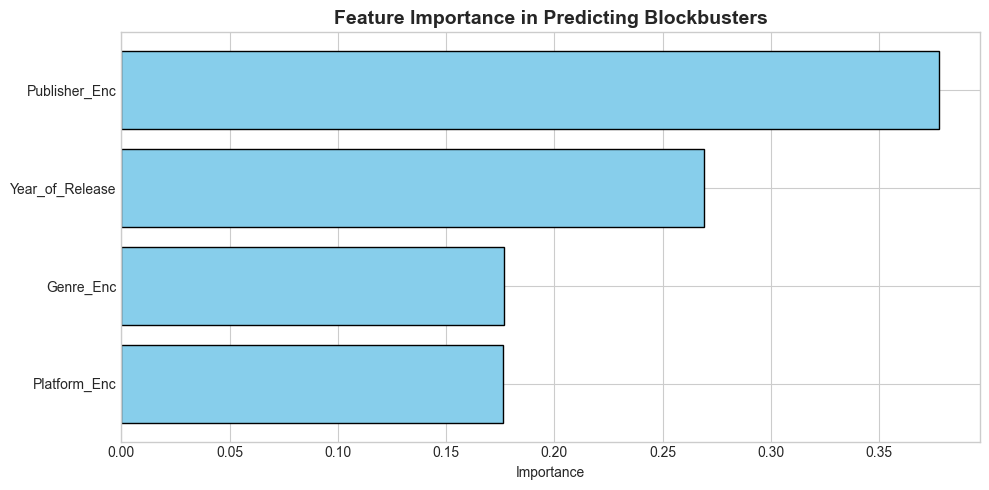


 Most Important Features:
           Feature  Importance
3    Publisher_Enc        0.38
0  Year_of_Release        0.27
2        Genre_Enc        0.18
1     Platform_Enc        0.18


In [48]:
# Feature importance in Predicting Blockbusters
feature_imp = pd.DataFrame({
    'Feature': features,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 5))
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color='skyblue', edgecolor='black')
plt.xlabel('Importance')
plt.title('Feature Importance in Predicting Blockbusters', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\n Most Important Features:")
print(feature_imp)

## *Understanding Model Performance Through the Confusion Matrix*

To get a clearer picture of how our Random Forest model is making decisions, we examined the confusion matrix. Unlike summary metrics such as accuracy or AUC, the confusion matrix shows exactly where the model is getting predictions right and where it is struggling.

The top-left cell represents the number of non-blockbuster games correctly identified as non-blockbusters, and this number is very high. The model is extremely confident when predicting the majority class. However, the bottom-right cell-true positives-reveals a challenge. Only a small portion of actual blockbuster games were correctly classified. Most blockbusters fall into the bottom-left cell, meaning they were mistakenly predicted as non-blockbusters.

This imbalance is not surprising. Since blockbusters make up only about 12.5% of the dataset, the model naturally leans toward predicting the majority class. Even with reasonable probability estimates, converting those into a strict yes/no prediction tends to favor non-blockbusters.

The confusion matrix highlights an important takeaway: while the model performs well overall, identifying rare blockbuster titles remains difficult. Improving this would likely require additional features, resampling techniques, or tuning the decision threshold. Still, the matrix provides valuable insight into how the model behaves and where its limitations lie.

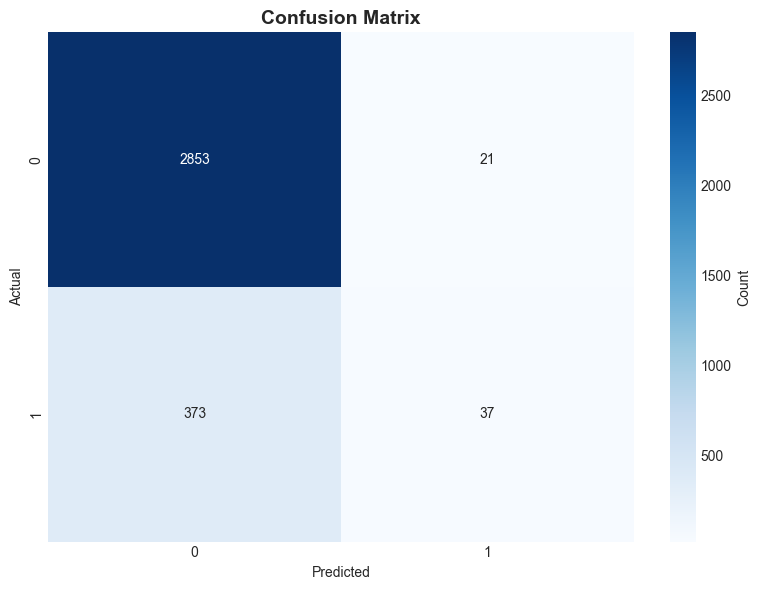

In [49]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

## *Comparing Multiple Models: Which One Predicts Blockbusters Best?*

To understand how well different algorithms handle the blockbuster prediction task, we evaluated three models side by side: Logistic Regression, Random Forest, and Gradient Boosting. Each model was trained on the same features and tested on the same split to ensure a fair comparison.

We measured performance using two metrics: overall accuracy and AUC (Area Under the ROC Curve). Accuracy tells us how often the model predicts correctly, while AUC shows how well the model separates blockbusters from non-blockbusters based on predicted probabilities.

The results show that *Random Forest* and *Gradient Boosting* perform almost identically, both achieving around 0.88 accuracy and AUC values above 0.82. Logistic Regression also reaches similar accuracy, but its AUC is noticeably lower, indicating that it has a harder time distinguishing between the two classes when ranking probabilities.

Overall, the tree-based models clearly do a better job capturing the nonlinear relationships in the data, such as the influence of platform, publisher, and release year. While none of the models perfectly detect blockbuster titles - largely because they make up a small portion of the dataset - the comparison helps confirm that ensemble methods provide the strongest predictive performance for this problem.

These findings guide our understanding of what modeling approaches are most suitable for predicting commercial game success, and they underline how challenging it is to classify rare but important outcomes like top-selling titles.


Model Comparison:
                     Accuracy  AUC
Gradient Boosting        0.88 0.83
Random Forest            0.88 0.83
Logistic Regression      0.88 0.61


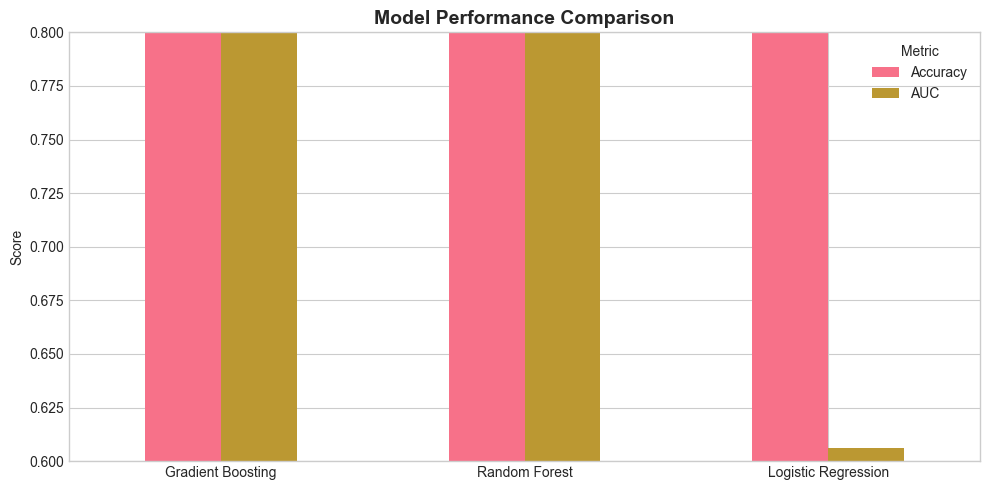

In [50]:
# Comparing Radndom Forest and Logisting Regression and Gradient Boost
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_m = model.predict(X_test)
    y_proba_m = model.predict_proba(X_test)[:, 1]
    
    acc = accuracy_score(y_test, y_pred_m)
    auc_m = roc_auc_score(y_test, y_proba_m)
    results[name] = {'Accuracy': acc, 'AUC': auc_m}

results_df = pd.DataFrame(results).T.sort_values('AUC', ascending=False)
print("\nModel Comparison:")
print(results_df)

# Visualize
results_df.plot(kind='bar', figsize=(10, 5), rot=0)
plt.title('Model Performance Comparison', fontsize=14, fontweight='bold')
plt.ylabel('Score')
plt.ylim(0.6, 0.8)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

## Conclusion

Through this tutorial, we explored what drives commercial success in the video game industry by analyzing over 16,000 games released between 1980 and 2016. By applying the full data science workflow, we were able to move beyond simple observations and uncover deeper patterns that explain how games perform in the market.

Our exploratory analysis revealed clear historical trends. The number of games released and total global sales both grew steadily over time, peaking around the late 2000s. This period aligns with the dominance of platforms such as the PlayStation 2, Xbox 360, and Nintendo Wii, highlighting how hardware generations strongly influence industry growth. Platform and manufacturer analysis further showed that a small number of companies have consistently shaped the gaming landscape across decades.

Genre analysis demonstrated that commercial success is unevenly distributed. Action, Sports, and Shooter games dominate total sales, while other genres maintain smaller but more specialized audiences. Regional analysis added another layer to this picture, showing that although overall genre distributions are similar, certain preferences—such as the popularity of role-playing games in Japan-stand out when examined more closely.

One of the most important findings relates to game quality and reviews. While critic scores show a statistically significant positive correlation with sales, the relationship is weak. User scores are even less predictive. This suggests that high-quality reviews alone do not guarantee success and that factors such as publisher strength, marketing reach, platform popularity, and release timing play much larger roles.

The machine learning models reinforced these insights. Even with a limited set of features, the models achieved reasonable predictive performance, but identifying rare blockbuster titles remained challenging due to class imbalance. Feature importance analysis revealed that publisher and release year were more influential than genre or platform, emphasizing the impact of business and market context over subjective quality measures.

Overall, this project shows that video game success is shaped by a combination of creative, economic, and temporal factors. There is no single formula for producing a hit, but data-driven analysis can help identify patterns that consistently matter. Beyond the gaming domain, this tutorial demonstrates how data science techniques can be applied to real-world, messy datasets to generate meaningful insights, combining statistical reasoning, visualization, and machine learning in a cohesive narrative.